# C4 penetration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import pandas as pd

## Datasets

In [2]:
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_hole0p5_pointsource_140keV_1MBq_1000s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_hole0p7_pointsource_140keV_1MBq_1000s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_col15gmL_hole0p7_pointsource_140keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_lead_hole0p7_pointsource_140keV_1MBq_10s.root'

# Tungsten
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_50keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_100keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_140keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_218keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungsten_hole0p7_pointsource_365keV_1MBq_10s.root'

# Tungsten epoxy
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_50keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_100keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_140keV_1MBq_10s.root'
filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_218keV_1MBq_10s.root'
# filename = '/Users/jcaravaca/Work_Local/data_overflow/C4/gate/results/C4_12heads_tungstenepoxy_hole0p7_pointsource_365keV_1MBq_10s.root'


## Parameters

In [3]:
PIXELID = 3894
ENERGYLO = 0.217


In [4]:
f = uproot.open(filename)
singles = f['Singles']
singles = singles.arrays()

## HeadID

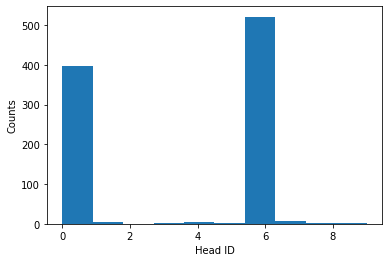

In [5]:
plt.hist(singles['headID'])
plt.xlabel('Head ID')
plt.ylabel('Counts')
plt.show()

In [6]:
singles = singles[singles['headID']==0]

## Pixel ID

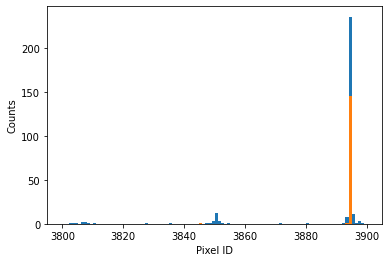

In [7]:
plt.hist(singles['pixelID'],bins=100,range=(3800,3900))
plt.hist(singles[singles['energy']>ENERGYLO]['pixelID'],bins=100,range=(3800,3900))
plt.xlabel('Pixel ID')
plt.ylabel('Counts')
plt.show()

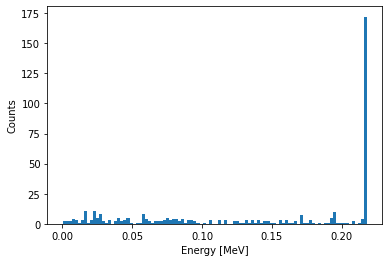

In [8]:
plt.hist(singles['energy'],bins=100)
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts')
plt.show()

## XY

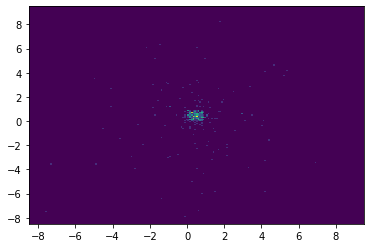

In [9]:
plt.hist2d(singles['globalPosX'].tolist(),singles['globalPosZ'].tolist(),bins=(200,200),range=((-8.5,9.5),(-8.5,9.5)))
plt.show()

## Penetration calculation

In [10]:
def calcPenetration(singles):
    singles_Esel = singles[singles['energy']>ENERGYLO]
    ntotal = len(singles_Esel)
    nhole = len(singles_Esel[singles_Esel['pixelID']==PIXELID])
    nsepta = ntotal - nhole
    pen = nsepta/ntotal

    print('ntotal',ntotal,'nhole',nhole,'nsepta',nsepta,'pen',pen)
    return pen

In [11]:
pen = calcPenetration(singles)
pen*100

ntotal 171 nhole 146 nsepta 25 pen 0.14619883040935672


14.619883040935672

In [12]:
# 19g/mL = ntotal 245 nhole 232 nsepta 13 pen 0.053061224489795916
# 15g/mL = ntotal 257 nhole 249 nsepta 8 pen 0.0311284046692607
# epoxy = ntotal 242 nhole 232 nsepta 10 pen 0.04132231404958678

## Summary plot

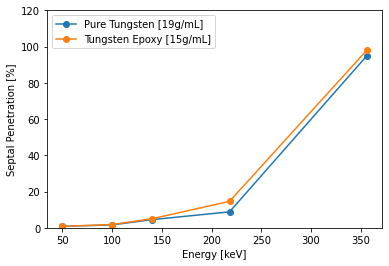

In [14]:
pen_tungsten = np.array([0.8, 1.6, 4.5, 8.8, 94.9])
pen_tungsten_epoxy = np.array([0.8, 1.8, 5.0, 14.6, 98.0])
energies = np.array([50.0,100.,140.,218.,356.])

plt.plot(energies,pen_tungsten,marker='o',label='Pure Tungsten [19g/mL]')
plt.plot(energies,pen_tungsten_epoxy,marker='o',label='Tungsten Epoxy [15g/mL]')
plt.ylim(0,120.)
plt.ylabel('Septal Penetration [%]')
plt.xlabel('Energy [keV]')
plt.legend(loc='upper left')
plt.show()